In [1]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [2]:
hist_data = pd.read_csv('Lai_Predicted_Data.csv')
hist_data.head(20)

,Close
0,144.36797
1,146.54659
2,146.30383
3,146.10506
4,144.15741
5,142.94124
6,143.98637
7,142.65640
8,142.58113
9,140.61604


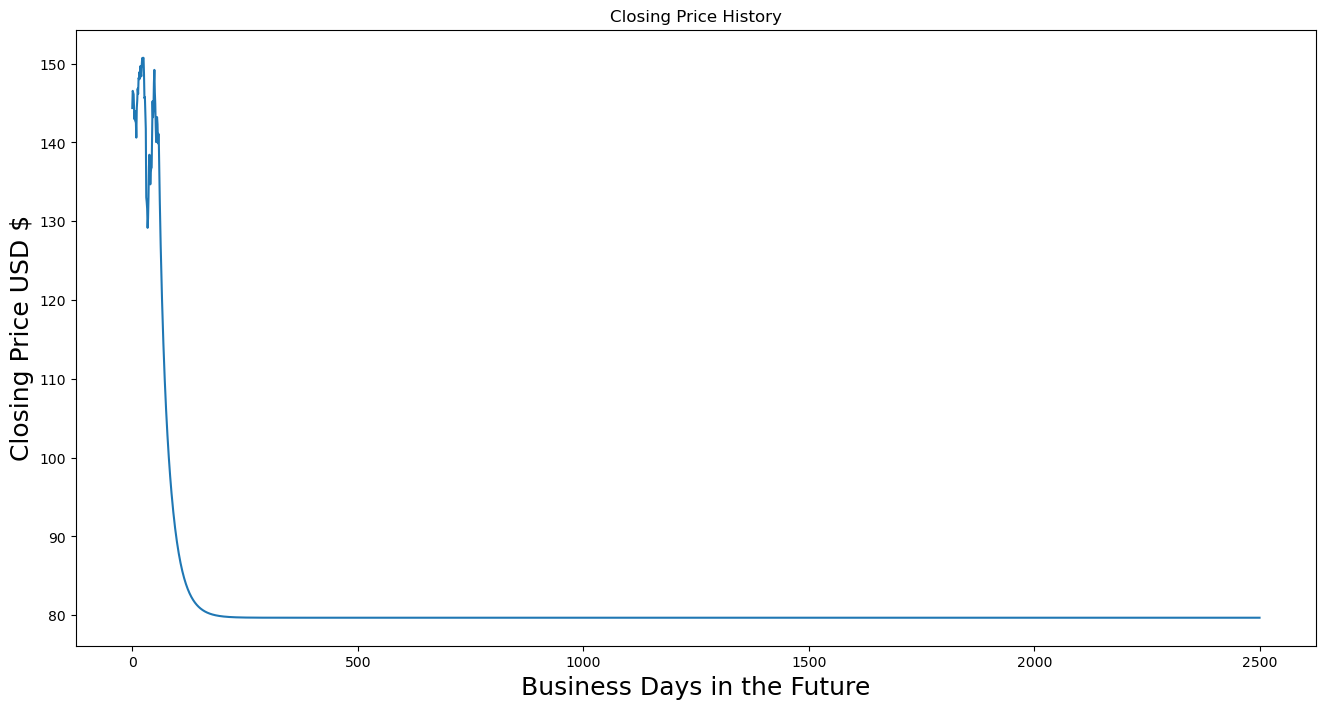

In [3]:
#Visualization of the Closing price
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(hist_data["Close"])
plt.xlabel("Business Days in the Future", fontsize=18)
plt.ylabel("Closing Price USD $", fontsize=18)
plt.show()

In [4]:
#Create a new dataframe with only the Adj Close Column
data = hist_data.filter(["Close"])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) #This is use to train 80% of the dataset

training_data_len

2000

In [5]:
dataset

array([[144.36797],
       [146.54659],
       [146.30383],
       ...,
       [ 79.69192],
       [ 79.69192],
       [ 79.69192]])

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
#Scaling the data means you are actually standardizing your data

array([[0.91013219],
       [0.94079009],
       [0.93737393],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [7]:
#Create the training model for the dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train & y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
#Reshape the data to a 3 dimensional shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
#Now you'll notice it a 3 dimensional shape

(1940, 60, 1)

In [9]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape= (x_train.shape[1], 1)))#50 means the no of input neurons
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))# Final output  

C:\Users\dilly\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
#Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [11]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)#Batch size the number of Batch per training, while epochs is the number of Iteration

Epoch 1/5
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 71s 33ms/step - loss: 0.0011
Epoch 2/5
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - loss: 6.8564e-04
Epoch 3/5
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - loss: 4.0100e-05
Epoch 4/5
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - loss: 2.3769e-04
Epoch 5/5
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 105s 54ms/step - loss: 1.2426e-04


In [12]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to end
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [13]:
scaled_data.shape

(2500, 1)

In [14]:
#Convert the data to a numpy array
x_test = np.array(x_test)#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#Evaluate the model: Getting the root square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step


0.20795945556641016

In [15]:
x_test

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])

In [16]:
predictions

array([[79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.89988],
       [79.8

C:\Users\dilly\AppData\Local\Temp\ipykernel_23028\3268257068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["Predictions"] = predictions


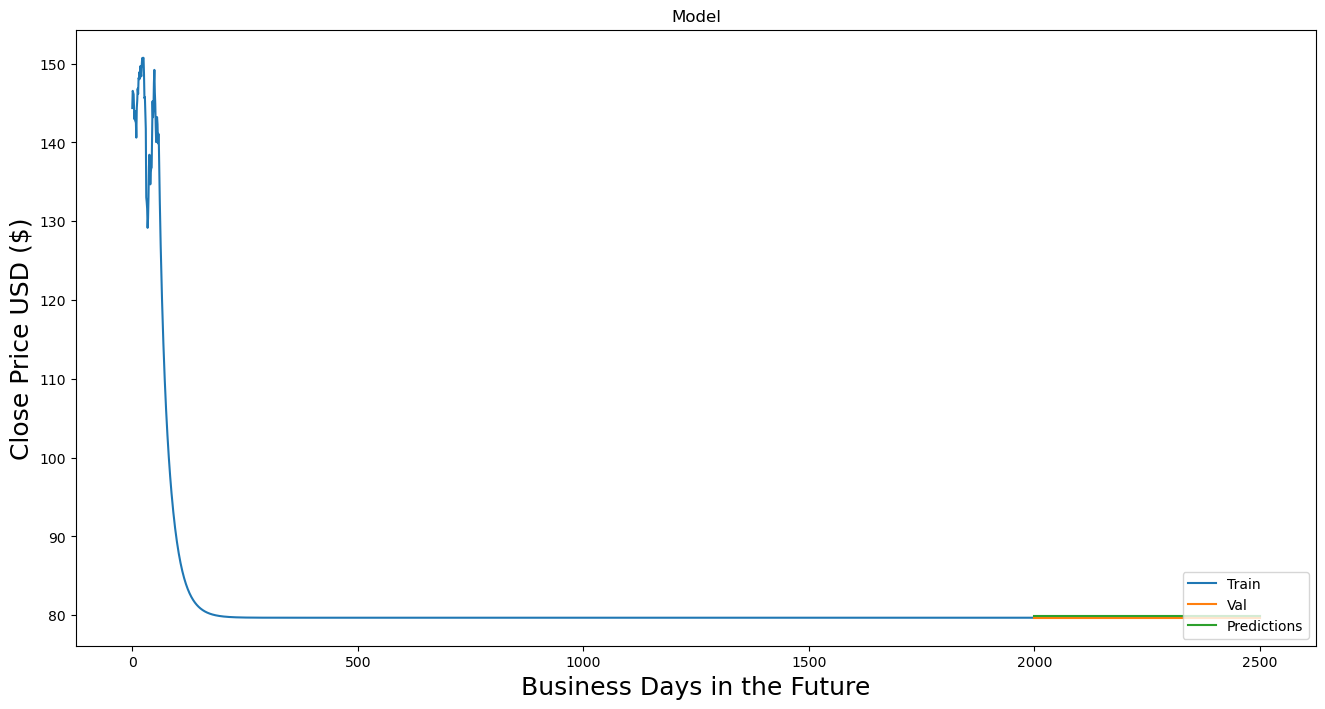

In [17]:
#Plot the data
train = data[:training_data_len]
validation = data[training_data_len:]
validation["Predictions"] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Business Days in the Future", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(validation[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [18]:
#Show the valid and predicted prices
validation
#This compares between the "Close" and "Predictions"

,Close,Predictions
2000,79.69192,79.899879
2001,79.69192,79.899879
2002,79.69192,79.899879
2003,79.69192,79.899879
2004,79.69192,79.899879
...,...,...
2495,79.69192,79.899879
2496,79.69192,79.899879
2497,79.69192,79.899879
2498,79.69192,79.899879
